In [15]:
import fitparse
import pandas as pd

In [16]:
wahoo = fitparse.FitFile("data/2022-07-14-225050-FITNESS FEA4-1-0.fit")
apple = fitparse.FitFile("data/2022-07-15-085248-Running-Azul.fit")

In [17]:
def get_formatted(fit_file):
    tmp = []
    for record in fit_file.get_messages('record'):
        # reset values
        timestamp = None
        heart_rate = None
        # Go through all the data entries in this record
        for record_data in record:
            if record_data.name == "heart_rate":
                heart_rate = record_data.value
            elif record_data.name == "timestamp":
                timestamp = record_data.value
        tmp.append([timestamp, heart_rate])
    return tmp

In [18]:
# timestamp: HR
wahoo_hr = get_formatted(wahoo)
apple_hr = get_formatted(apple)

In [19]:
wahoo_df = pd.DataFrame(wahoo_hr, columns=["timestamp", "wahoo_hr"])
apple_df = pd.DataFrame(apple_hr, columns=["timestamp", "apple_hr"])

In [20]:
df = wahoo_df.merge(apple_df, on="timestamp")

In [21]:
df[df["wahoo_hr"] != df["apple_hr"]]

,timestamp,wahoo_hr,apple_hr
0,2022-07-14 22:52:48,95.0,162.0
1,2022-07-14 22:52:49,96.0,NaN
2,2022-07-14 22:52:50,97.0,NaN
3,2022-07-14 22:52:51,100.0,NaN
4,2022-07-14 22:52:52,102.0,NaN
...,...,...,...
838,2022-07-14 23:06:46,156.0,158.0
839,2022-07-14 23:06:47,155.0,158.0
840,2022-07-14 23:06:48,155.0,157.0
841,2022-07-14 23:06:49,155.0,156.0


<AxesSubplot:xlabel='timestamp'>

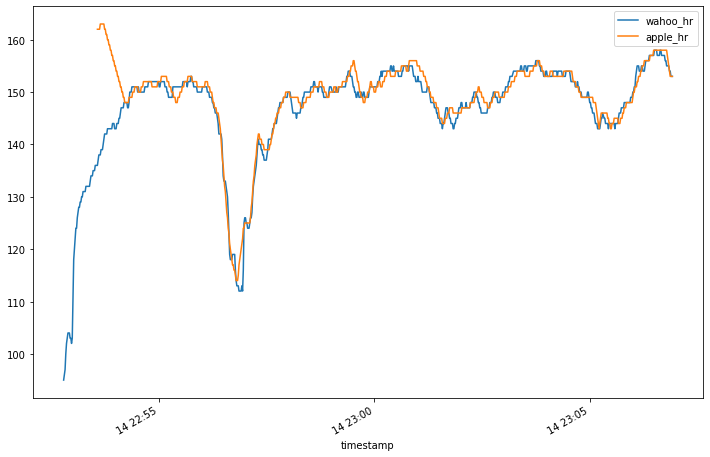

In [22]:
df.set_index("timestamp").plot(figsize=(12, 8))

In [ ]:
[x for x in wahoo.get_messages("device_info")]

In [ ]:
[x for x in apple_watch.get_messages("device_info")]

In [23]:
df["diff"] = df["apple_hr"] - df["wahoo_hr"]
df["zero"] = 0

<AxesSubplot:title={'center':'How far apple is from wahoo'}, xlabel='timestamp'>

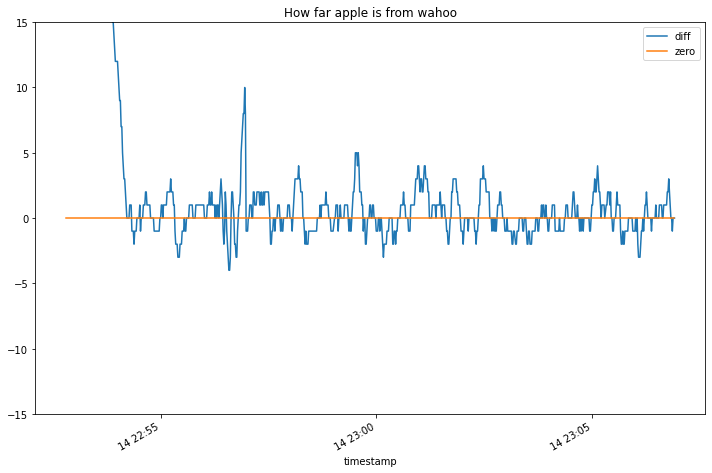

In [24]:
df[["timestamp", "diff", "zero"]].set_index("timestamp").plot(figsize=(12, 8), title="How far apple is from wahoo", ylim=(-15, 15))